In [ ]:
# paramter = level of quantized gray level

# extract color features

# extract lbp

# extract glcm

In [3]:
from utils.prep import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = ""
img = read_image("/home/surayuth/her2/Data_Chula/1 Sep HER2 2+ DISH - case 2/1 Sep D- HER2 - case 02 (1).JPG")

<BarContainer object of 10 artists>

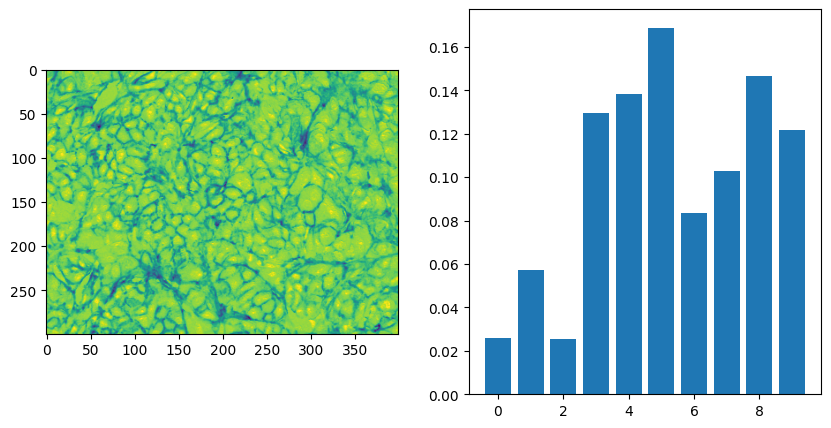

In [58]:
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

level = 32

normalizer = NumpyMacenkoNormalizer()
normalizer.fit(img)
Inorm, H, DAB = normalizer.normalize(img)
gray = cv2.cvtColor(DAB, cv2.COLOR_RGB2GRAY)
q_gray = np.round(
        ((gray - gray.min()) / (gray.max() - gray.min())) * 
        (level - 1)
    ).astype(np.uint8)

color_feat = gray.mean()

# lbp
lbp = local_binary_pattern(q_gray, P=8, R=1, method="uniform")    
hists = np.histogram(lbp, bins=10)[0]
hists = (hists / (hists.sum() + 1e-8)).tolist()

# glcm
glcm = graycomatrix(
    q_gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
    levels=level, symmetric=True, normed=False
).astype(float)

contrast = graycoprops(glcm, "contrast").reshape(-1).mean()
dissim = graycoprops(glcm, "dissimilarity").reshape(-1).mean()
homo = graycoprops(glcm, "homogeneity").reshape(-1).mean()
asm = graycoprops(glcm, "ASM").reshape(-1).mean()
energy = graycoprops(glcm, "energy").reshape(-1).mean()
corrs = graycoprops(glcm, "correlation").reshape(-1).mean()
entropy = np.array([shannon_entropy(glcm[:,:,0,i]) for i in range(4)]).mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gray)
axs[1].bar(np.arange(len(hists)), hists)